# 3. Data Pre Processing

<a id="contents"></a>
# Table of Contents  
3.1. [Introduction](#introduction)  
3.2. [Imports](#imports)   
3.3. [Define Features and Target](#define)  
3.4. [Data Splitting and Normalization](#data)

## 3.1 Introduction<a id="introduction"></a>

The goal of this notebook is to create a cleaned development dataset to be used to complete the modeling step of my project.

## 3.2 Imports<a id="imports"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.dates as mdates
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import csv
from tqdm.notebook import tqdm
import datetime as dt

  

In [2]:
df = pd.read_csv('/Users/heatheradler/Documents/GitHub/Springboard/Springboard_Projects/Stock_Predictor_Capstone/Concated_Dataframe.csv')
df = df[df['stock_symbol'].isin(['EL','ULTA','COTY','ELF','HELE'])]
formulas_to_keep = ['stock_symbol','Date', 'Open', 'High', 'Low', 'Close','Volume', 'Dividends', 'Stock Splits', 'EMA_10', 'PSARl_0.02_0.2', 'PSARs_0.02_0.2', 'BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0', 'ISA_9', 'ISB_26', 'ITS_9', 'IKS_26', 'ICS_26']
df = df[formulas_to_keep]
df.head()

,stock_symbol,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,EMA_10,PSARl_0.02_0.2,PSARs_0.02_0.2,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26
0,ULTA,2007-10-25,28.728543,34.612703,28.570313,29.490023,7487306,0.0,0.0,29.490023,29.490023,29.490023,29.490023,29.490023,29.490023,29.490023,29.490023,29.490023,29.490023,26.008974
1,ULTA,2007-10-26,30.211945,32.615056,28.926331,31.645901,1625582,0.0,0.0,29.882000,28.570313,29.882000,29.882000,29.882000,29.882000,29.882000,29.882000,29.882000,29.882000,25.563955
2,ULTA,2007-10-29,32.130481,34.612704,32.130481,34.316025,668513,0.0,0.0,30.688187,28.570313,30.688187,30.688187,30.688187,30.688187,30.688187,30.688187,30.688187,30.688187,26.246321
3,ULTA,2007-10-30,34.830269,35.206062,32.634834,35.037945,455543,0.0,0.0,31.479052,28.812009,31.479052,31.479052,31.479052,31.479052,31.479052,31.479052,31.479052,31.479052,27.185806
4,ULTA,2007-10-31,35.987321,35.987321,32.585388,33.821556,393584,0.0,0.0,31.904962,29.195652,31.904962,28.800881,32.862290,36.923698,31.904962,31.904962,31.904962,31.904962,27.670383


In [3]:
df.Date = pd.to_datetime(df.Date)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27914 entries, 0 to 27913
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   stock_symbol    27914 non-null  object        
 1   Date            27914 non-null  datetime64[ns]
 2   Open            27914 non-null  float64       
 3   High            27914 non-null  float64       
 4   Low             27914 non-null  float64       
 5   Close           27914 non-null  float64       
 6   Volume          27914 non-null  int64         
 7   Dividends       27914 non-null  float64       
 8   Stock Splits    27914 non-null  float64       
 9   EMA_10          27914 non-null  float64       
 10  PSARl_0.02_0.2  27914 non-null  float64       
 11  PSARs_0.02_0.2  27914 non-null  float64       
 12  BBL_5_2.0       27914 non-null  float64       
 13  BBM_5_2.0       27914 non-null  float64       
 14  BBU_5_2.0       27914 non-null  float64       
 15  IS

## 3.3 Define features and target<a id="define"></a>

In [5]:
df['Date'] = df['Date'].dt.strftime('%m/%d/%Y')

splitted = df['Date'].str.split('/', expand=True) 
  
df['day'] = splitted[1].astype('int') 
df['month'] = splitted[0].astype('int') 
df['year'] = splitted[2].astype('int') 
  
df.head()

,stock_symbol,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,EMA_10,...,BBM_5_2.0,BBU_5_2.0,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,day,month,year
0,ULTA,10/25/2007,28.728543,34.612703,28.570313,29.490023,7487306,0.0,0.0,29.490023,...,29.490023,29.490023,29.490023,29.490023,29.490023,29.490023,26.008974,25,10,2007
1,ULTA,10/26/2007,30.211945,32.615056,28.926331,31.645901,1625582,0.0,0.0,29.882000,...,29.882000,29.882000,29.882000,29.882000,29.882000,29.882000,25.563955,26,10,2007
2,ULTA,10/29/2007,32.130481,34.612704,32.130481,34.316025,668513,0.0,0.0,30.688187,...,30.688187,30.688187,30.688187,30.688187,30.688187,30.688187,26.246321,29,10,2007
3,ULTA,10/30/2007,34.830269,35.206062,32.634834,35.037945,455543,0.0,0.0,31.479052,...,31.479052,31.479052,31.479052,31.479052,31.479052,31.479052,27.185806,30,10,2007
4,ULTA,10/31/2007,35.987321,35.987321,32.585388,33.821556,393584,0.0,0.0,31.904962,...,32.862290,36.923698,31.904962,31.904962,31.904962,31.904962,27.670383,31,10,2007


In [6]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0) 
df.head()

,stock_symbol,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,EMA_10,...,BBU_5_2.0,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,day,month,year,is_quarter_end
0,ULTA,10/25/2007,28.728543,34.612703,28.570313,29.490023,7487306,0.0,0.0,29.490023,...,29.490023,29.490023,29.490023,29.490023,29.490023,26.008974,25,10,2007,0
1,ULTA,10/26/2007,30.211945,32.615056,28.926331,31.645901,1625582,0.0,0.0,29.882000,...,29.882000,29.882000,29.882000,29.882000,29.882000,25.563955,26,10,2007,0
2,ULTA,10/29/2007,32.130481,34.612704,32.130481,34.316025,668513,0.0,0.0,30.688187,...,30.688187,30.688187,30.688187,30.688187,30.688187,26.246321,29,10,2007,0
3,ULTA,10/30/2007,34.830269,35.206062,32.634834,35.037945,455543,0.0,0.0,31.479052,...,31.479052,31.479052,31.479052,31.479052,31.479052,27.185806,30,10,2007,0
4,ULTA,10/31/2007,35.987321,35.987321,32.585388,33.821556,393584,0.0,0.0,31.904962,...,36.923698,31.904962,31.904962,31.904962,31.904962,27.670383,31,10,2007,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27914 entries, 0 to 27913
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   stock_symbol    27914 non-null  object 
 1   Date            27914 non-null  object 
 2   Open            27914 non-null  float64
 3   High            27914 non-null  float64
 4   Low             27914 non-null  float64
 5   Close           27914 non-null  float64
 6   Volume          27914 non-null  int64  
 7   Dividends       27914 non-null  float64
 8   Stock Splits    27914 non-null  float64
 9   EMA_10          27914 non-null  float64
 10  PSARl_0.02_0.2  27914 non-null  float64
 11  PSARs_0.02_0.2  27914 non-null  float64
 12  BBL_5_2.0       27914 non-null  float64
 13  BBM_5_2.0       27914 non-null  float64
 14  BBU_5_2.0       27914 non-null  float64
 15  ISA_9           27914 non-null  float64
 16  ISB_26          27914 non-null  float64
 17  ITS_9           27914 non-null 

In [8]:
df['year'] = pd.to_datetime(df['Date']).dt.year

/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_26170/4060073793.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot layout to prevent overlap
/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_26170/4060073793.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot layout to prevent overlap
/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_26170/4060073793.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot layout to prevent overlap


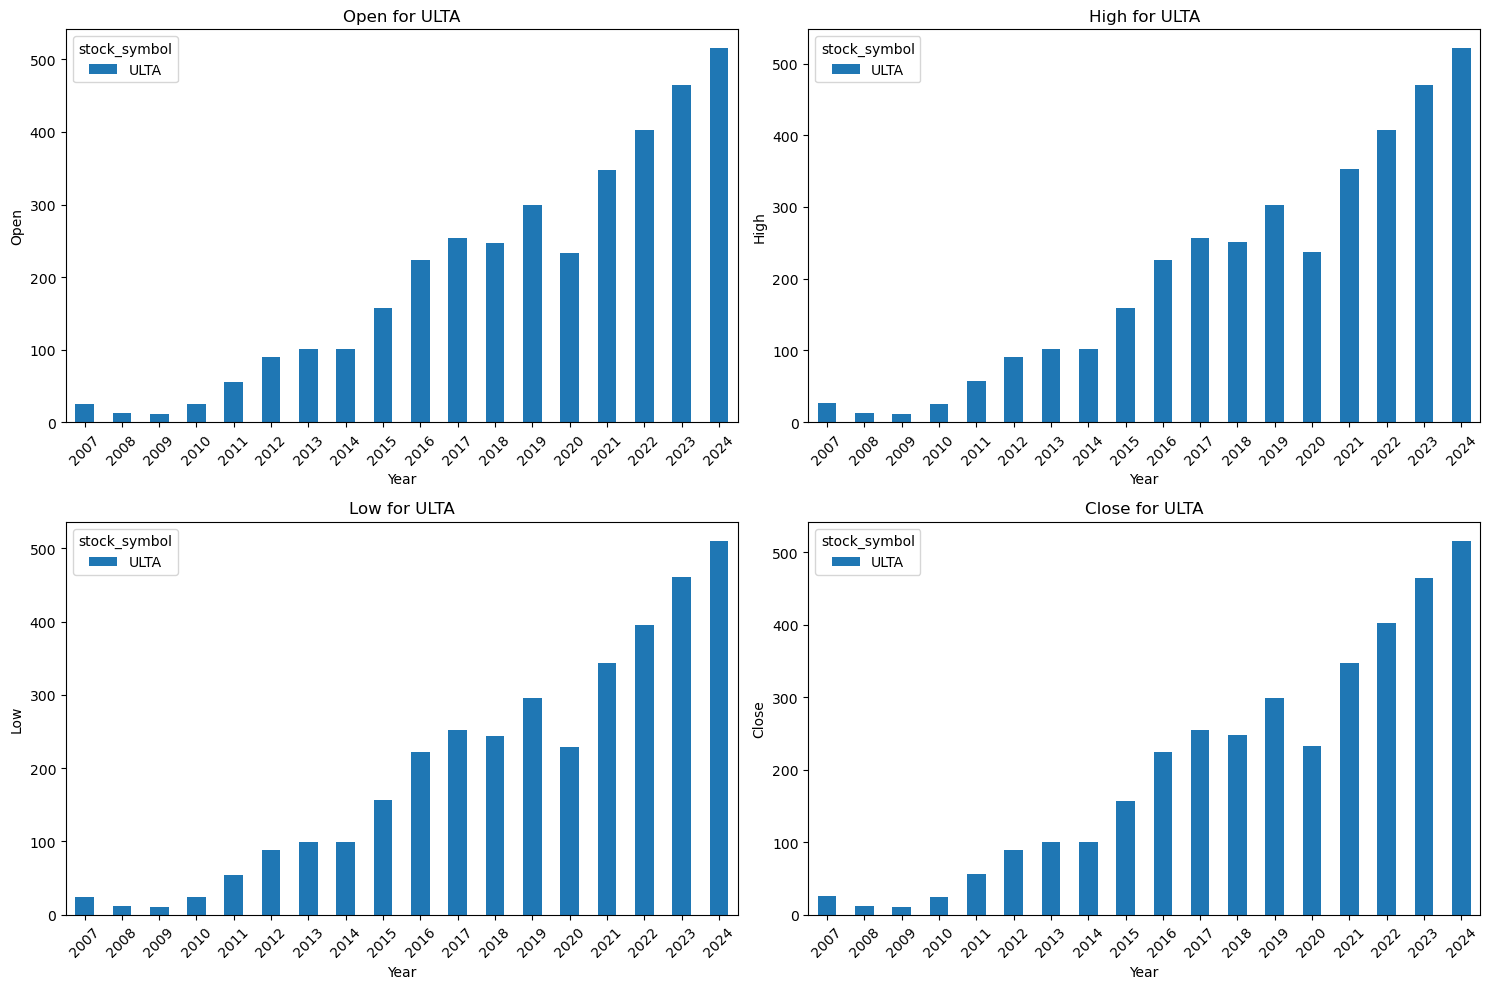

/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_26170/4060073793.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot layout to prevent overlap
/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_26170/4060073793.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot layout to prevent overlap
/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_26170/4060073793.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot layout to prevent overlap


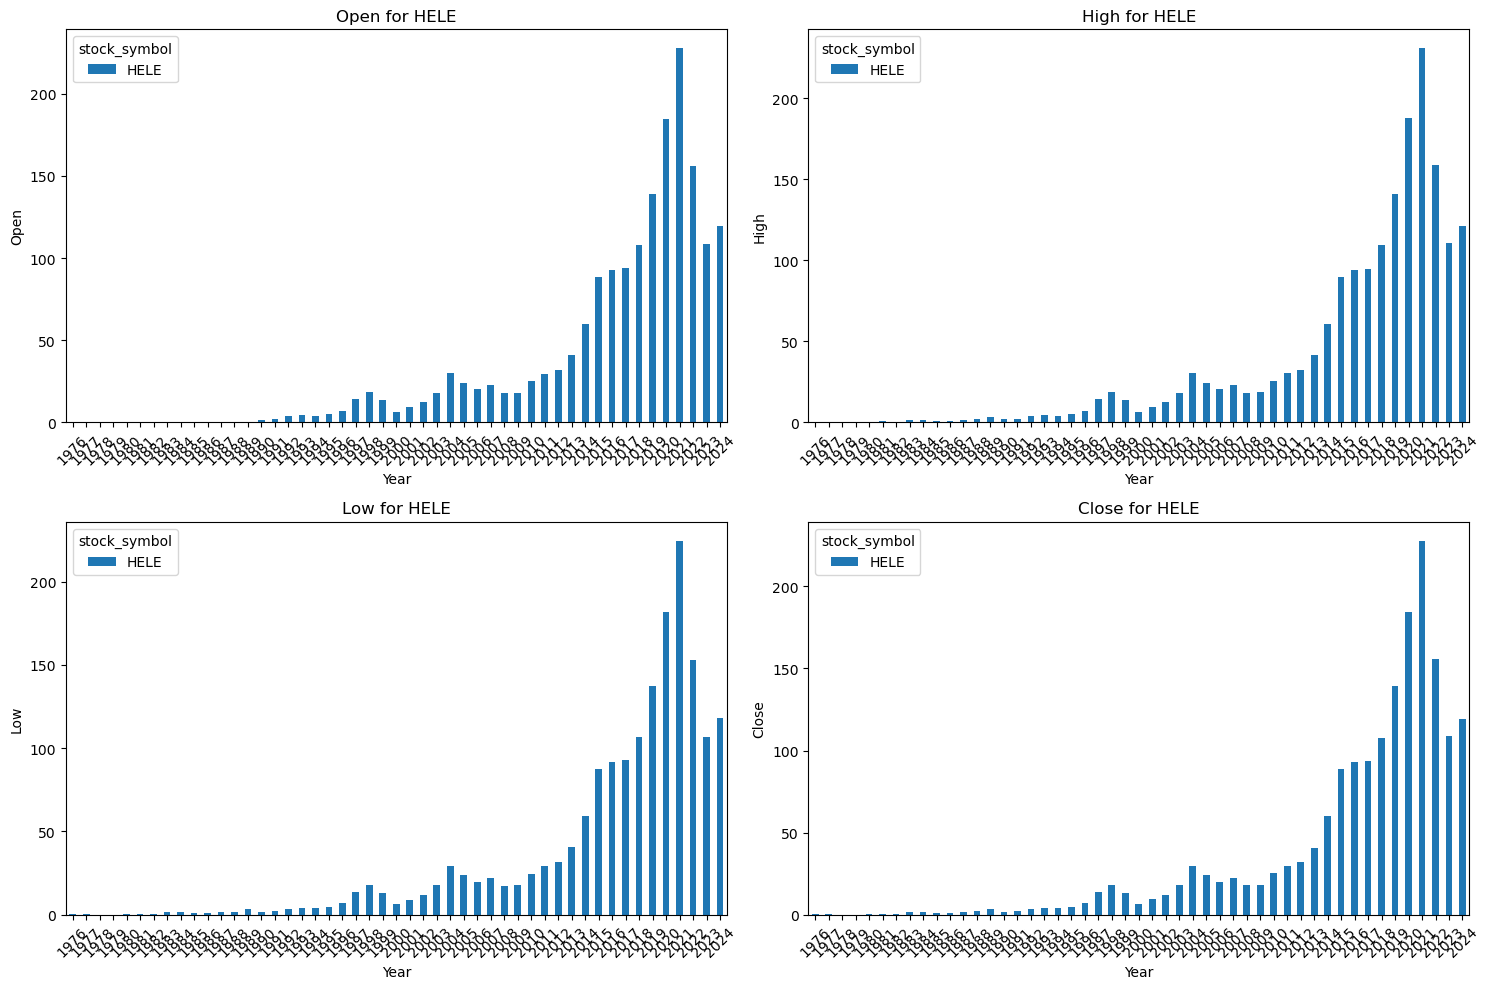

/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_26170/4060073793.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot layout to prevent overlap
/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_26170/4060073793.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot layout to prevent overlap
/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_26170/4060073793.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot layout to prevent overlap


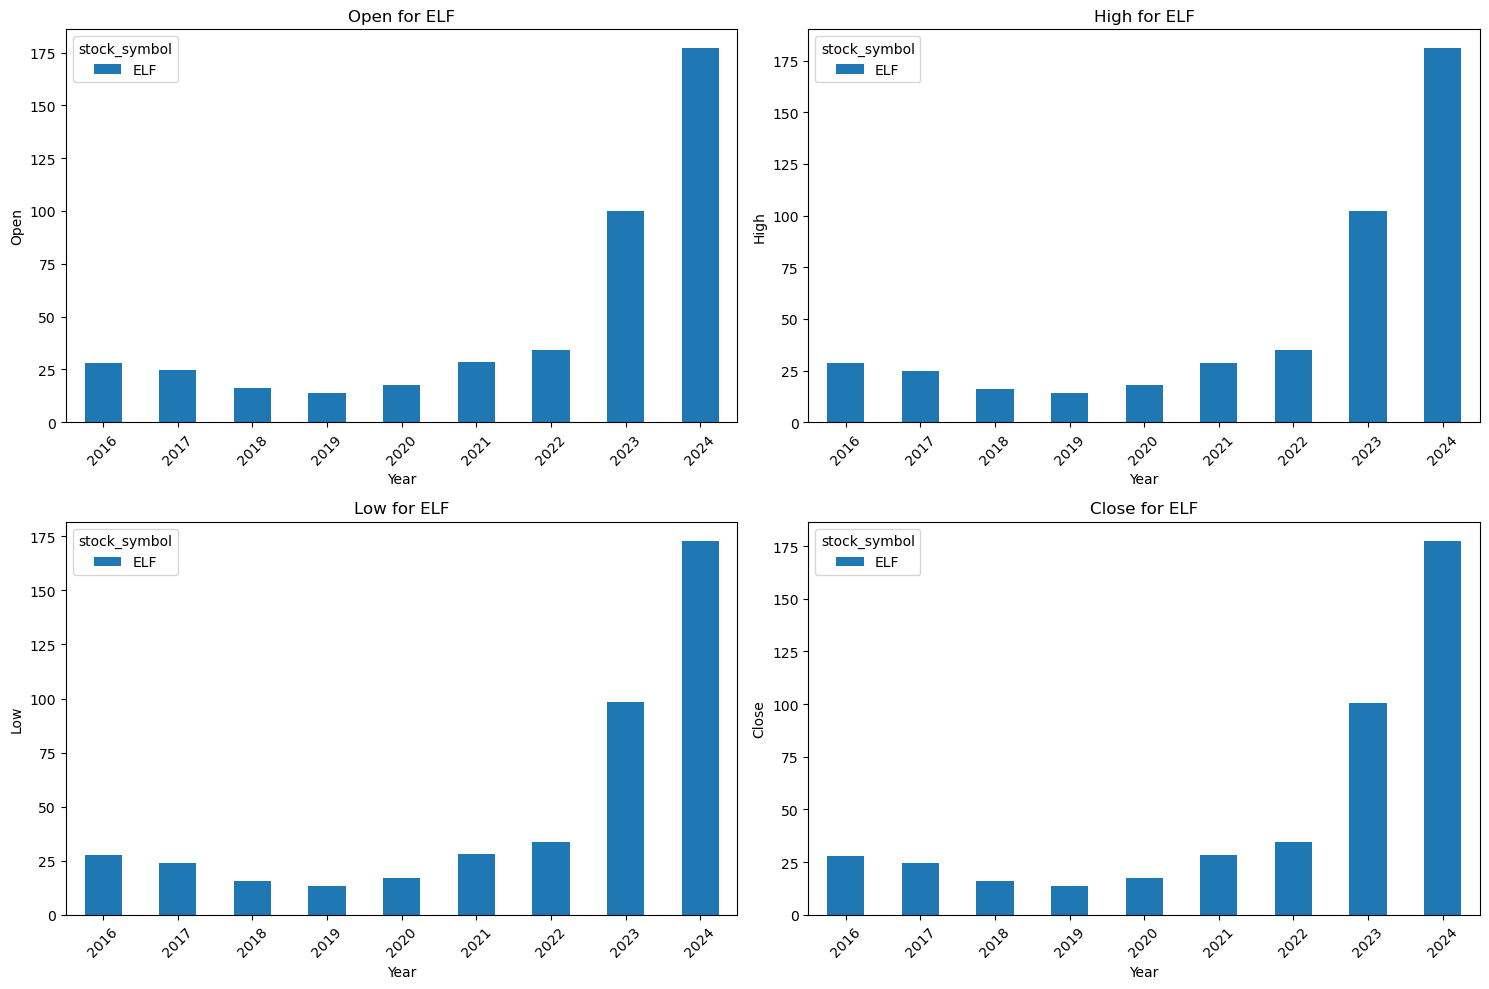

/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_26170/4060073793.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot layout to prevent overlap
/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_26170/4060073793.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot layout to prevent overlap
/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_26170/4060073793.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot layout to prevent overlap


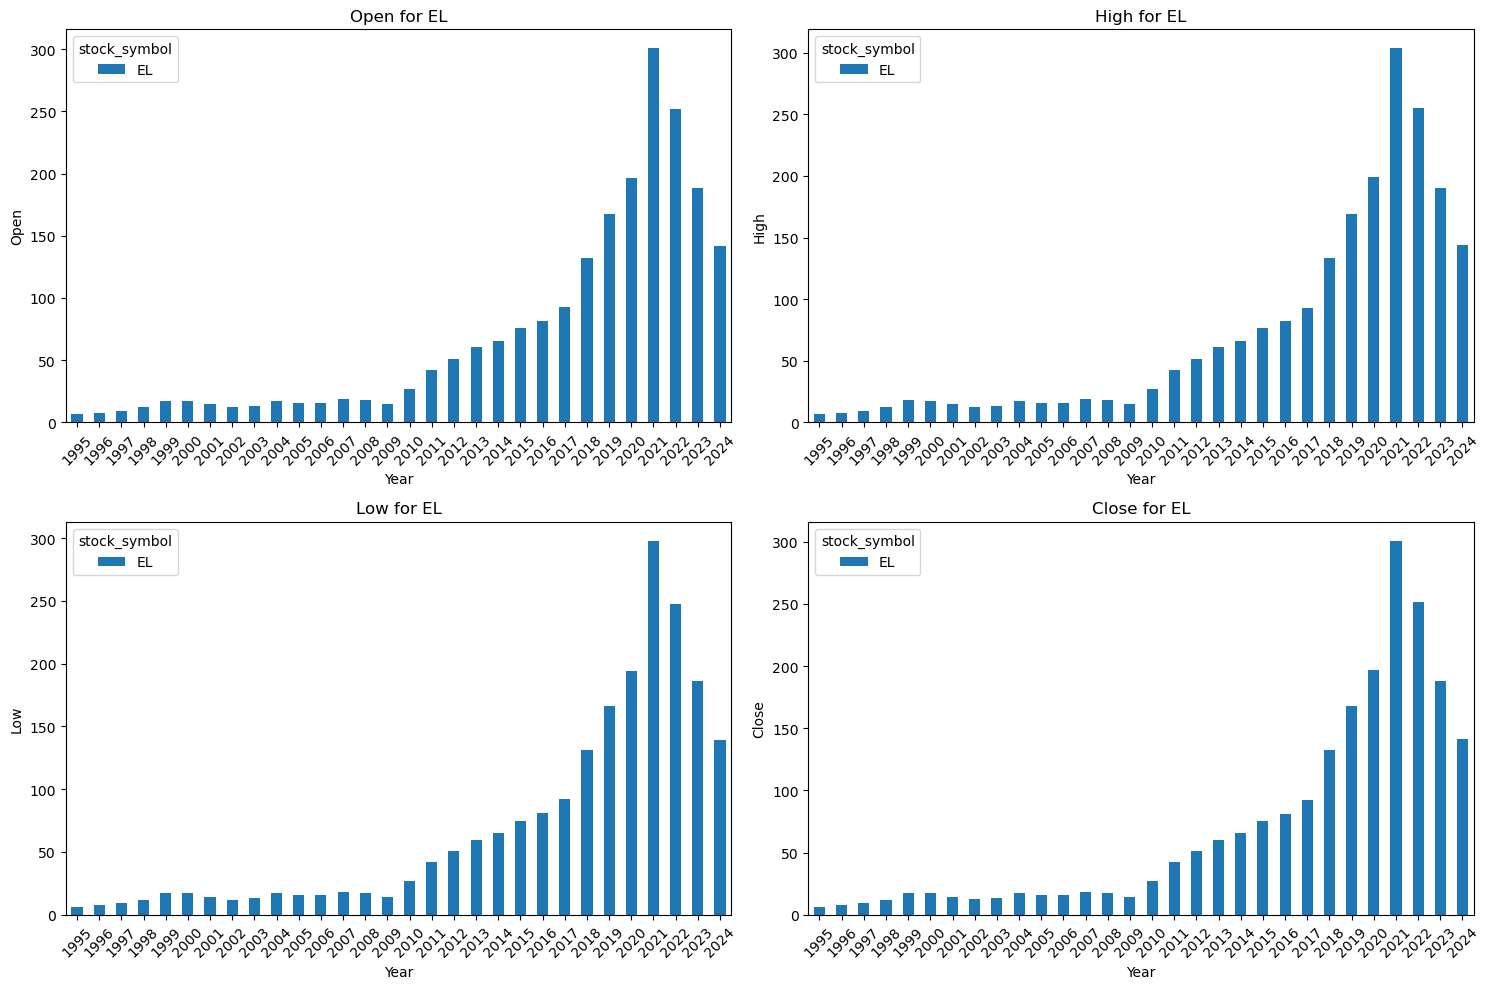

/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_26170/4060073793.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot layout to prevent overlap
/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_26170/4060073793.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot layout to prevent overlap
/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_26170/4060073793.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # Adjust subplot layout to prevent overlap


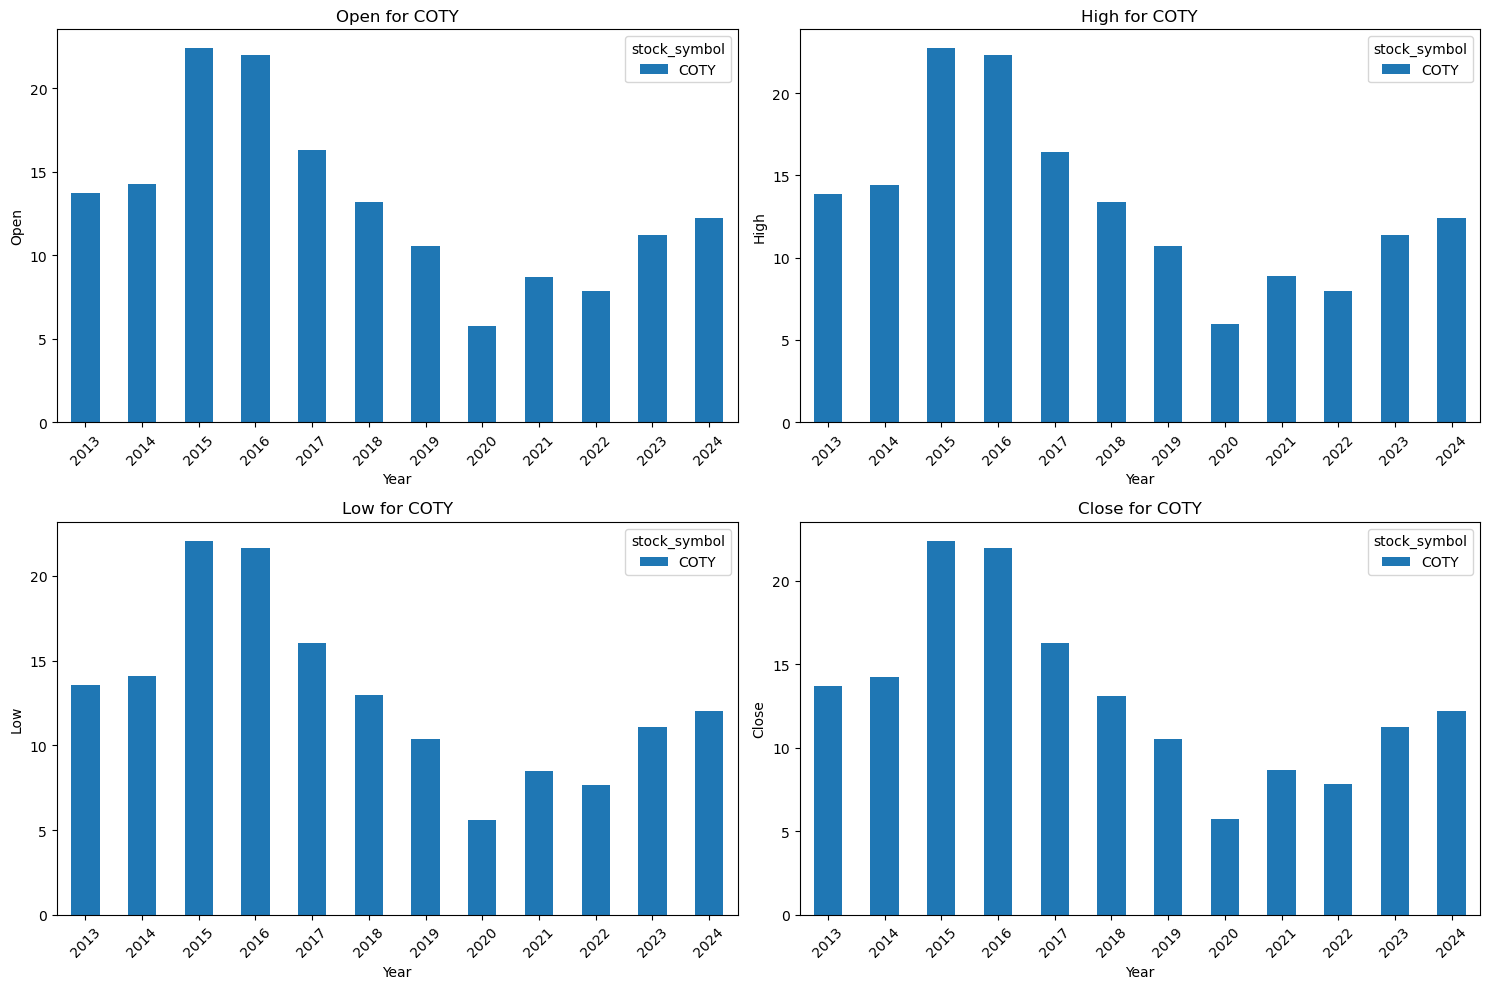

In [9]:
cols_to_keep = ['stock_symbol', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
                'EMA_10', 'PSARl_0.02_0.2', 'PSARs_0.02_0.2', 'BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0',
                'ISA_9', 'ISB_26', 'ITS_9', 'IKS_26', 'ICS_26', 'day', 'month', 'year', 'is_quarter_end']

# Select the columns of interest
df_1 = df[cols_to_keep]

# Group the data by 'stock_symbol' and 'year', then calculate the mean
data_grouped = df_1.groupby(['stock_symbol', 'year']).mean().reset_index()

# Get unique stock symbols
unique_symbols = df_1['stock_symbol'].unique()

# Create separate plots for each stock symbol
for symbol in unique_symbols:
    data_symbol = data_grouped[data_grouped['stock_symbol'] == symbol]
    num_cols = 2  # Number of columns in the subplot grid
    num_rows = 2   # Number of rows in the subplot grid

    plt.figure(figsize=(15, 10))  # Adjust the figure size
    for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
        plt.subplot(num_rows, num_cols, i + 1)
        ax = data_symbol.pivot(index='year', columns='stock_symbol', values=col).plot(kind='bar',ax=plt.gca())
        plt.title(f'{col} for {symbol}')
        plt.xlabel('Year')
        plt.ylabel(col)
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.tight_layout()  # Adjust subplot layout to prevent overlap
    plt.show()

### Observations:
From the above bar graphs, we can conclude that the stock prices for all stock symbols except for COTY have increased over the years. More specifically:

   **ULTA**: Stock prices more than doubled from 2020 to 2024.<br>
   **HELE**: Stock prices steadliy increased from 1995 to 2021. From
    there, stock prices reduced by almost half in 2024.<br>
    **ELF**: Stock prices more than doubled from the year 2016 to that
    in 2024.<br>
    **EL**: Stock prices steadliy increased from 1995 to 2021. From 
    there, stock prices essentially were cut in half in 2024.<br>
    **COTY**: Stock prices were at a high in 2015 before steady 
    declining  and hitting its low in 2010. From there, the stock
    prices basically doubled in 2024. 

In [10]:
# Convert 'Volume' column to float format
df_1['Volume'] = df_1['Volume'].astype(float)

# Set the display format for float values
pd.options.display.float_format = '{:.2f}'.format

# Group by 'stock_symbol' and 'is_quarter_end' and calculate the mean
mean_df = df_1.groupby(['stock_symbol', 'is_quarter_end']).mean()
mean_df

/var/folders/9q/j_dp7nx93lbc_t5zbbshxpch0000gn/T/ipykernel_26170/3592498416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Volume'] = df_1['Volume'].astype(float)


Open   High    Low  Close     Volume  Dividends  \
stock_symbol is_quarter_end                                                     
COTY         0               13.17  13.37  12.95  13.16 6036883.22       0.00   
             1               13.32  13.51  13.12  13.32 6191262.95       0.00   
EL           0               69.02  69.80  68.26  69.04 2116260.90       0.00   
             1               70.25  70.98  69.47  70.23 1865954.63       0.00   
ELF          0               36.76  37.48  36.06  36.82  731673.54       0.00   
             1               40.03  40.77  39.24  40.01  746191.09       0.00   
HELE         0               34.79  35.57  34.52  35.06  191080.66       0.00   
             1               35.09  35.85  34.85  35.36  178546.85       0.00   
ULTA         0              191.14 193.66 188.65 191.21  766160.26       0.00   
             1              193.59 196.06 190.90 193.48  968503.70       0.00   

                             Stock Splits  EMA_10  PSARl_0.02_0.2  \
stock_symbol is_quarter_end                                         
COTY         0                       0.00   13.16           12.71   
             1                       0.00   13.32           12.81   
EL           0                       0.00   68.96           66.98   
             1                       0.00   70.14           67.99   
ELF          0                       0.00   36.34           34.46   
             1                       0.00   39.74           37.60   
HELE         0                       0.00   34.98           33.77   
             1                       0.00   35.40           34.32   
ULTA         0                       0.00  190.49          184.53   
             1                       0.00  193.31          185.24   

                             PSARs_0.02_0.2  ...  BBM_5_2.0  BBU_5_2.0  ISA_9  \
stock_symbol is_quarter_end                  ...                                
COTY         0                        13.65  ...      13.16      13.64  13.29   
             1                        13.82  ...      13.32      13.77  13.20   
EL           0                        70.57  ...      69.00      70.93  68.47   
             1                        71.79  ...      70.19      72.04  69.01   
ELF          0                        37.58  ...      36.56      38.25  34.26   
             1                        41.33  ...      39.98      41.65  35.93   
HELE         0                        36.09  ...      35.03      36.18  34.53   
             1                        36.41  ...      35.36      36.46  35.33   
ULTA         0                       195.19  ...     190.89     196.47 186.67   
             1                       199.41  ...     193.41     200.01 188.73   

                             ISB_26  ITS_9  IKS_26  ICS_26   day  month  \
stock_symbol is_quarter_end                                               
COTY         0                13.29  13.18   13.22   13.25 15.74   6.13   
             1                13.27  13.33   13.30   13.10 15.83   7.45   
EL           0                67.87  68.89   68.72   69.84 15.74   6.06   
             1                68.82  70.10   69.62   70.20 15.75   7.44   
ELF          0                33.08  36.31   35.73   39.68 15.71   6.10   
             1                35.18  39.74   38.61   41.38 15.91   7.43   
HELE         0                34.41  34.96   34.82   35.21 15.74   6.09   
             1                35.12  35.36   35.39   35.85 15.77   7.45   
ULTA         0               184.04 190.32  188.95  194.46 15.74   6.07   
             1               186.41 193.22  191.77  196.70 15.74   7.44   

                               year  
stock_symbol is_quarter_end          
COTY         0              2018.35  
             1              2018.30  
EL           0              2009.57  
             1              2009.53  
ELF          0              2019.98  
             1              2019.97  
HELE         0              1999.85  
            

### Observations:
a. Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.

b. The volume of trades is higher in the months which are quarter end for COTY, ELF, and ULTA but higher in the months which are not quarter end for EL and HELE.

### Next, we will add additional columns to help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only.

In [11]:
df_1['open-close'] = df_1['Open'] - df_1['Close'] 
df_1['low-high'] = df_1['Low'] - df_1['High'] 
df_1['target'] = np.where(df_1['Close'].shift(-1) > df_1['Close'], 1, 0)

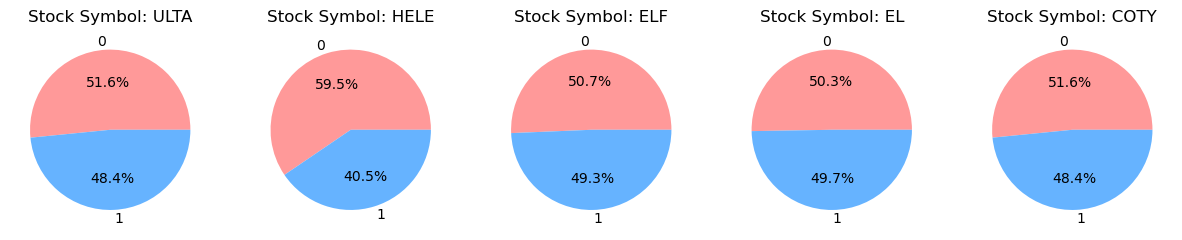

In [12]:
# Define colors for 0 and 1
colors = ['#ff9999', '#66b3ff']  # Red for 0, Blue for 1

# Get unique stock symbols
unique_symbols = df_1['stock_symbol'].unique()

# Create subplots for each stock symbol
fig, axs = plt.subplots(1, len(unique_symbols), figsize=(15, 5))

# Iterate over unique stock symbols and plot pie chart
for i, symbol in enumerate(unique_symbols):
    symbol_data = df_1[df_1['stock_symbol'] == symbol]
    target_counts = symbol_data['target'].value_counts().values
    axs[i].pie(target_counts, labels=[0, 1], autopct='%1.1f%%', colors=colors)
    axs[i].set_title(f'Stock Symbol: {symbol}')

plt.show()

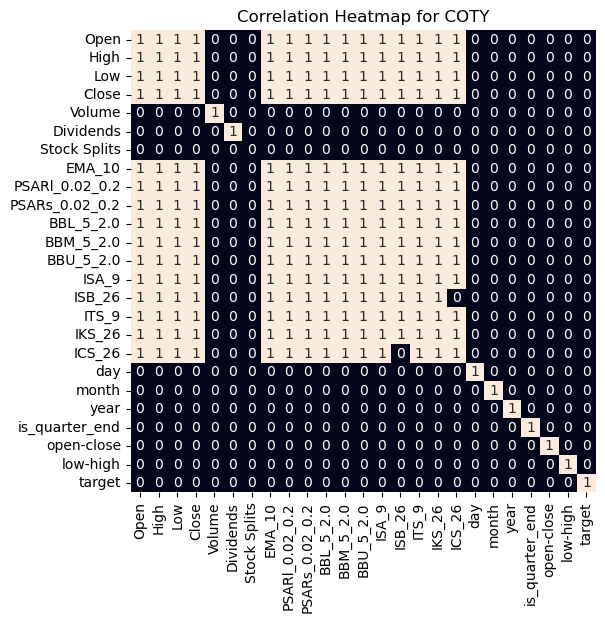

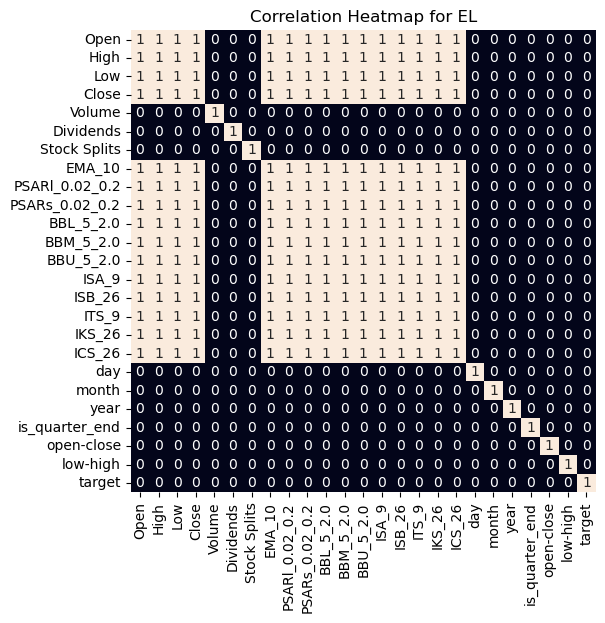

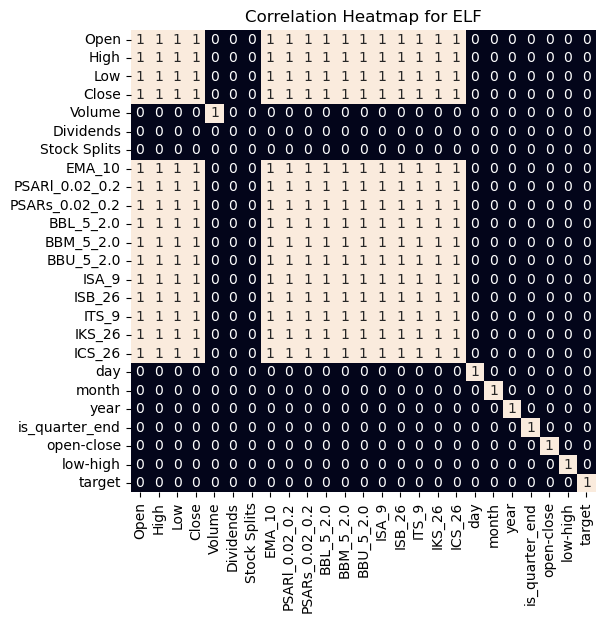

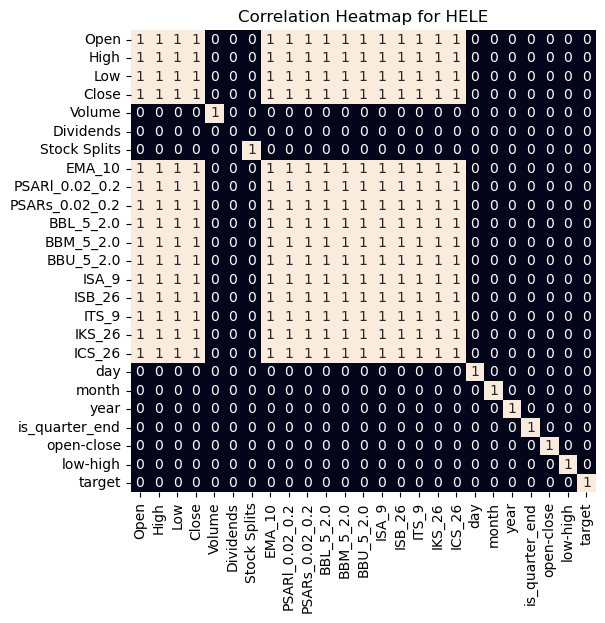

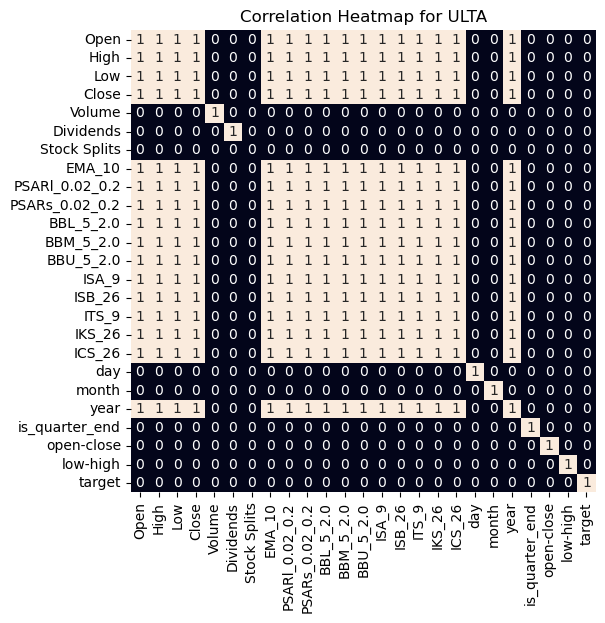

In [13]:
# Group by stock symbol and plot correlation matrix heatmaps
for symbol, group in df_1.groupby('stock_symbol'):
    numeric_df = group.select_dtypes(include=['number'])
    plt.figure(figsize=(6, 6))
    plt.title(f'Correlation Heatmap for {symbol}')
    sns.heatmap(numeric_df.corr() > 0.9, annot=True, cbar=False)
    plt.show()

### Observations:
From the above heatmaps, we can say that there is a high correlation between Open, High, Low, and Close for all stock symbols. Additionally, the added features are highly correlated with each other which means they should be removed before we build our model.

In [14]:
cols = ['stock_symbol','Open', 'High', 'Low', 'Close','Volume', 'Dividends', 'Stock Splits', 'day', 'month', 'year', 'is_quarter_end', 'open-close', 'low-high', 'target']
df_2 = df_1[cols]
df_2.head()

,stock_symbol,Open,High,Low,Close,Volume,Dividends,Stock Splits,day,month,year,is_quarter_end,open-close,low-high,target
0,ULTA,28.73,34.61,28.57,29.49,7487306.00,0.00,0.00,25,10,2007,0,-0.76,-6.04,1
1,ULTA,30.21,32.62,28.93,31.65,1625582.00,0.00,0.00,26,10,2007,0,-1.43,-3.69,1
2,ULTA,32.13,34.61,32.13,34.32,668513.00,0.00,0.00,29,10,2007,0,-2.19,-2.48,1
3,ULTA,34.83,35.21,32.63,35.04,455543.00,0.00,0.00,30,10,2007,0,-0.21,-2.57,0
4,ULTA,35.99,35.99,32.59,33.82,393584.00,0.00,0.00,31,10,2007,0,2.17,-3.40,0


## 3.4 Data Splitting and Normalization<a id="data"></a>

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Group by stock symbol and split data and normalize features separately
scalers = {}
X_train_list, X_valid_list, Y_train_list, Y_valid_list = [], [], [], []

for symbol, group in df_2.groupby('stock_symbol'):
    features = group[['open-close', 'low-high', 'is_quarter_end']]
    target = group['target']
    
    # Split data into train and validation sets
    X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
    
    # Normalize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_valid_scaled = scaler.transform(X_valid)
    
    scalers[symbol] = scaler
    X_train_list.append(X_train_scaled)
    X_valid_list.append(X_valid_scaled)
    Y_train_list.append(Y_train)
    Y_valid_list.append(Y_valid)

# Concatenate scaled features and targets
X_train = pd.concat([pd.DataFrame(X_train) for X_train in X_train_list])
X_valid = pd.concat([pd.DataFrame(X_valid) for X_valid in X_valid_list])
Y_train = pd.concat([pd.Series(Y_train) for Y_train in Y_train_list])
Y_valid = pd.concat([pd.Series(Y_valid) for Y_valid in Y_valid_list])

print(X_train.shape, X_valid.shape)

(25120, 3) (2794, 3)


In [16]:
#features = df_2[['open-close', 'low-high', 'is_quarter_end']] 
#target = df_2['target'] 

#scaler = StandardScaler() 
#features = scaler.fit_transform(features) 

#X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022) 
#print(X_train.shape, X_valid.shape) 

In [17]:
# save concatenated dataframe
df_2.to_csv('/Users/heatheradler/Documents/GitHub/Springboard/Springboard_Projects/Stock_Predictor_Capstone/Updated_df.csv')
